In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurenphipps/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#read in data
office = pd.read_csv('The-Office-Lines-V3.csv', encoding='latin1')
#isolate 'dinner party' episode
df = office[office['title'] == 'Dinner Party']
#drop not needed columns
df = df.drop(columns = ['season', 'episode', 'title'])
df = df.replace({'Michae': 'Michael'})

In [3]:
df

,scene,speaker,line
16583,2803,Stanley,This is ridiculous.
16584,2803,Phyllis,Do you have any idea what time we'll get out o...
16585,2803,Michael,"Nobody likes to work late, least of all me. D..."
16586,2803,Jim,"Nope I don't, remember when you told us not to..."
16587,2803,Michael,"Yes I remember. Mmm, this is B.S. This is B.S...."
...,...,...,...
16860,2823,Pam,"This is the best burger I've ever had, babe."
16861,2823,Jim,"You know, babe, I should have told you but... ..."
16862,2823,Pam,Hmm?
16863,2823,Jim,I stole this. For you babe.


In [4]:
df.speaker.value_counts()

Michael        90
Jan            73
Jim            38
Pam            28
Dwight         16
Angela         12
Andy           10
Woman           5
Officer 1       3
Officer 2       2
Hunter's CD     1
Stanley         1
All             1
Officer         1
Phyllis         1
Name: speaker, dtype: int64

In [5]:
michael = df[df['speaker'] == 'Michael']
jan = df[df['speaker'] == 'Jan']
jim = df[df['speaker'] == 'Jim']
pam = df[df['speaker'] == 'Pam']


jim

,scene,speaker,line
16586,2803,Jim,"Nope I don't, remember when you told us not to..."
16590,2803,Jim,I think you did.
16592,2803,Jim,"Oh, I-"
16594,2804,Jim,Michael has asked Pam and me to dinner at leas...
16601,2807,Jim,Hi.
16606,2807,Jim,"Let's see, since I saw you an hour ago?"
16608,2807,Jim,I have been getting ready and then driving ove...
16610,2807,Jim,Really?
16617,2807,Jim,"Tour, let's do the tour first."
16622,2807,Jim,"Oh, you guys doing a little construction?"


In [6]:
#tokenize lines
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

dfs = ['michael', 'jan', 'jim', 'pam']
def tokenize(df):
    df['tokenized_line'] = [tokenizer.tokenize(x) for x in df['line']]
    
    return df

    

In [7]:
tokenize(jim)
tokenize(pam)
tokenize(michael)
tokenize(jan)


/Users/laurenphipps/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,scene,speaker,line,tokenized_line
16599,2807,Jan,Hi.,[Hi]
16602,2807,Jan,How are you?,"[How, are, you]"
16604,2807,Jan,Chilly huh? So glad we finally got to do this ...,"[Chilly, huh, So, glad, we, finally, got, to, ..."
16613,2807,Jan,"Oh well Pam, thank you, this will be great to ...","[Oh, well, Pam, thank, you, this, will, be, gr..."
16616,2807,Jan,"So what do you guys think, should we do the to...","[So, what, do, you, guys, think, should, we, d..."
...,...,...,...,...
16826,2821,Jan,FOR AN INVESTMENT OPPORTUNITY!,"[FOR, AN, INVESTMENT, OPPORTUNITY]"
16828,2821,Jan,YOU BURN IT. YOU BUY IT!,"[YOU, BURN, IT, YOU, BUY, IT]"
16830,2821,Jan,AND YOU'RE HARDLY MY FIRST!,"[AND, YOU, RE, HARDLY, MY, FIRST]"
16847,2822,Jan,Michael! Michael. What are you doing to him?,"[Michael, Michael, What, are, you, doing, to, ..."


In [8]:
michael_lines = []
for i in range(len(michael)):
    michael_lines.extend(michael.tokenized_line.iloc[i])
    i+=1

jan_lines = []
for i in range(len(jan)):
    jan_lines.extend(jan.tokenized_line.iloc[i])
    i+=1

pam_lines = []
for i in range(len(pam)):
    pam_lines.extend(pam.tokenized_line.iloc[i])
    i+=1

jim_lines = []
for i in range(len(jim)):
    jim_lines.extend(jim.tokenized_line.iloc[i])
    i+=1


In [9]:
michael_lines = [x.lower() for x in michael_lines]
jan_lines = [x.lower() for x in jan_lines]
pam_lines = [x.lower() for x in pam_lines]
jim_lines = [x.lower() for x in jim_lines]

In [10]:
stop_words=set(stopwords.words("english"))
pam_filtered_lines=[]
for w in pam_lines:
    if w not in stop_words:
        pam_filtered_lines.append(w)

michael_filtered_lines=[]
for w in michael_lines:
    if w not in stop_words:
        michael_filtered_lines.append(w)
        
jan_filtered_lines=[]
for w in jan_lines:
    if w not in stop_words:
        jan_filtered_lines.append(w)
        
jim_filtered_lines=[]
for w in jim_lines:
    if w not in stop_words:
        jim_filtered_lines.append(w)

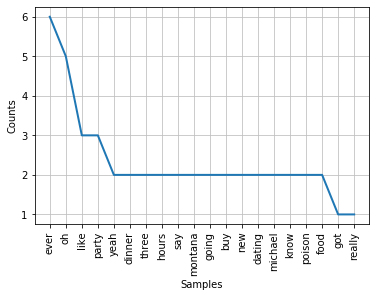

In [30]:
fdist_pam = FreqDist(pam_filtered_lines)

fdist_pam.plot(20)


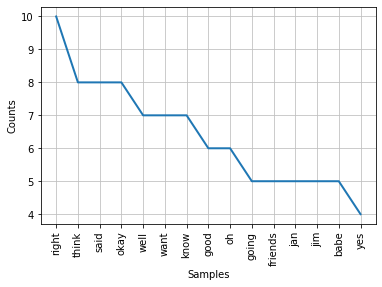

In [31]:
fdist_michael = FreqDist(michael_filtered_lines)

fdist_michael.plot(15)

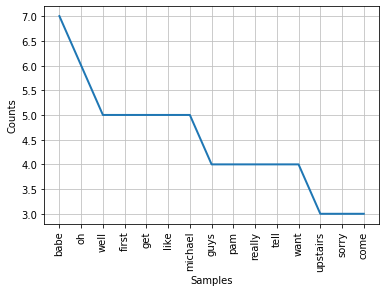

In [32]:
fdist_jan = FreqDist(jan_filtered_lines)

fdist_jan.plot(15)

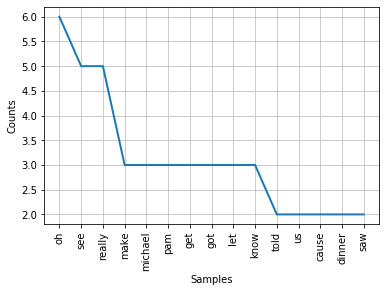

In [33]:
fdist_jim = FreqDist(jim_filtered_lines)

fdist_jim.plot(15)

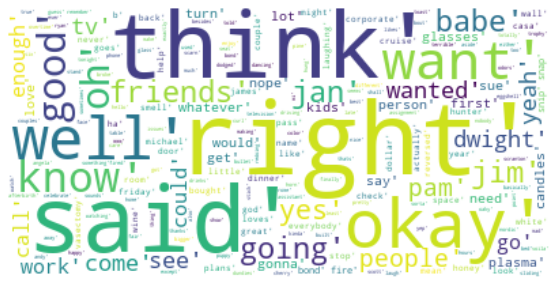

In [38]:
text = str(michael_filtered_lines)

michael_cloud = WordCloud(background_color = 'white', stopwords = None).generate(text)

plt.figure(figsize = (10, 5))
plt.imshow(michael_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

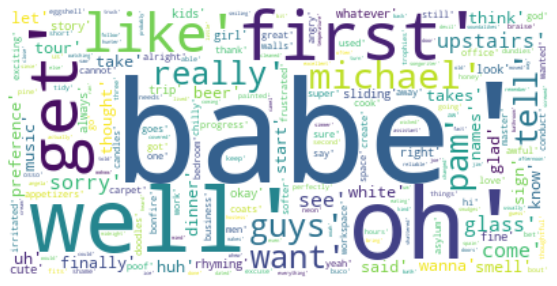

In [41]:
text = str(jan_filtered_lines)

jan_cloud = WordCloud(background_color = 'white', stopwords = None).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(jan_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig

In [17]:
from textblob import TextBlob

In [19]:
michael_tb = str(michael_filtered_lines)
jan_tb = str(jan_filtered_lines)
jim_tb = str(jim_filtered_lines)
pam_tb = str(pam_filtered_lines)

TextBlob(michael_tb).sentiment

Sentiment(polarity=0.24174783549783552, subjectivity=0.49674873737373737)

In [20]:
TextBlob(jan_tb).sentiment

Sentiment(polarity=0.14314892623716155, subjectivity=0.5778166822284467)

In [21]:
TextBlob(jim_tb).sentiment

Sentiment(polarity=0.055416666666666684, subjectivity=0.5541666666666667)

In [22]:
TextBlob(pam_tb).sentiment

Sentiment(polarity=0.38727272727272727, subjectivity=0.5309090909090909)

In [27]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

michael_lem=[]
for w in michael_filtered_lines:
    michael_lem.append(lemmatizer.lemmatize(w))

michael_lem=[]
for w in michael_filtered_lines:
    michael_lem.append(lemmatizer.lemmatize(w))
    
michael_lem=[]
for w in michael_filtered_lines:
    michael_lem.append(lemmatizer.lemmatize(w))

michael_lem=[]
for w in michael_filtered_lines:
    michael_lem.append(lemmatizer.lemmatize(w))

AttributeError: 'list' object has no attribute 'plot'